In [1]:
pip install -r requirement.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
from torchvision.transforms import v2
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [3]:
### 1. Image Dataset Extraction and Preprocessing

## 1.1 Getting training and testing dataset directory
## 1.2 Function of extracting dataset images
## 1.3 Extracting dataset images
## 1.4 Image size and total image count
## 1.5 Function of label count for 1.7
## 1.6 Function of graph plot for 1.7
## 1.7 Dataset and label distribution graph
## 1.8 Showcase first image of train and testing dataset
## 1.9 Function of extracting first n images of all emotions for 1.10
## 1.10 Showcase grid of example images of all emotion labels
## 1.11 Showcase of conversion of greyscale images to RGB images (For architecture purposes)
## 1.12 Showcase of resizing of image to 224 x 244 pixels (For architecture purposes)
## 1.13 Function for detecting faces using Haar Cascade Classifier for 1.14
## 1.14 Showcase detected face comparison with original image 
## 1.15 Function to crop detected face and scale to 48x48 pixels for 1.16
## 1.16 Showcase comparison between original image and cropped detected face image
## 1.17 Showcase of comparisons between original image and randomly horizontal fliped image
## 1.18 Showcase of comparisons between original image and randomly cropped image up to 10%
## 1.19 Showcase of comparisons between original image and scalling image between 80% to 120% and rotating betweeen -25 to 25
## 1.20 Showcase of comparisons between original image and brightness adjusted image
## 1.21 Showcase of comparisons between original image and contrast adjusted image
## 1.22 Showcase 10 Transformed Image With Combination of All Transformation 
## 1.23 Whole Function for Entire Preprocessing Step
## 1.24 Testing for Whole Preprocess Image for The Dataset
## 1.25 Testing for image saving mechanism
## 1.26 Preprocess and Save Images into Dataset as Tensor

In [4]:
## 1.1 Getting training and testing dataset directory

current_wd = os.getcwd()

train_directory = os.path.join(current_wd, "raw_data", "train")

test_directory = os.path.join(current_wd, "raw_data", "test")

print(train_directory)
print(test_directory)

c:\Users\ADMIN\Documents\XIAMEN\Github Projects\DL-Assignment\raw_data\train
c:\Users\ADMIN\Documents\XIAMEN\Github Projects\DL-Assignment\raw_data\test


In [5]:
## 1.2 Function of extracting dataset images

def datasetLoader(root):
    imgPaths = []
    labels = []

    for label in os.listdir(root):
        emotionDir = os.path.join(root, label)
        for filename in os.listdir(emotionDir):
            imgPath = os.path.join(root, label, filename)
            imgPaths.append(imgPath)
            labels.append(label)
        
        print(f"Faces of '{label}' extraction completed.")
    
    return imgPaths, labels

def datasetLoader_testVal(root):
    test_imgPaths = []
    test_labels = []

    val_imgPaths = []
    val_labels = []

    count = 0

    for label in os.listdir(root):
        emotionDir = os.path.join(root, label)
        for filename in os.listdir(emotionDir):
            count += 1
            
            if (count % 2) == 0:
                test_imgPath = os.path.join(root, label, filename)
                test_imgPaths.append(test_imgPath)
                test_labels.append(label)
            else:
                val_imgPath = os.path.join(root, label, filename)
                val_imgPaths.append(val_imgPath)
                val_labels.append(label)
        
        print(f"Faces of '{label}' extraction completed.")
    
    return test_imgPaths, test_labels, val_imgPaths, val_labels

In [6]:
## 1.3.1 Extracting dataset images (training)

train_img, train_label = datasetLoader(train_directory)

print("\n", train_img[:5], "\n")
print(train_label[:5])

Faces of 'angry' extraction completed.
Faces of 'disgust' extraction completed.
Faces of 'fear' extraction completed.
Faces of 'happy' extraction completed.
Faces of 'neutral' extraction completed.
Faces of 'sad' extraction completed.
Faces of 'surprise' extraction completed.

 ['c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_10118481.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_10120469.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_10131352.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_10161559.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\train\\angry\\Training_1021836.jpg'] 

['angry', 'angry', 'angry', 'angry', 'angry']


In [7]:
## 1.3.2 Extracting dataset images (testing)

test_img, test_label, val_img, val_label = datasetLoader_testVal(test_directory)

print("\n", test_img[:5], "\n")
print(train_label[:5])

print("\n", val_img[:5], "\n")
print(val_label[:5])

Faces of 'angry' extraction completed.
Faces of 'disgust' extraction completed.
Faces of 'fear' extraction completed.
Faces of 'happy' extraction completed.
Faces of 'neutral' extraction completed.
Faces of 'sad' extraction completed.
Faces of 'surprise' extraction completed.

 ['c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10304478.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10590091.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_11296953.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_12008383.jpg', 'c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_1221822.jpg'] 

['angry', 'angry', 'angry', 'angry', 'angry']

 ['c:\\Users\\ADMIN\\Documents\\XIAMEN\\Github Projects\\DL-Assignment\\

In [8]:
## 1.4 Image size and total image count

filepath = test_img[0]

img = cv2.imread(filepath)

width = img.shape[1]
height = img.shape[0]

totalImg = 0
totalImg += len(train_img)
totalImg += len(test_img)

print(f"The height of a single image is: {height} pixels")
print(f"The width of a single image is {width} pixels")
print(f"Number of pixels per image: {width*height}\n")

print(f"The total number of train images are {len(train_img)}")
print(f"The total number of test images are {len(test_img)}")
print(f"The total number of images are {totalImg}")

The height of a single image is: 48 pixels
The width of a single image is 48 pixels
Number of pixels per image: 2304

The total number of train images are 28709
The total number of test images are 3589
The total number of images are 32298


In [9]:
## 1.5 Function of label count for 1.7

def labelsCountAndName(label_list):
    name_list = []
    num_list = [0, 0, 0, 0, 0, 0, 0]
    progressPointer = -1

    for label in label_list:
        
        if label not in name_list:
            name_list.append(label)
            progressPointer += 1

        num_list[progressPointer] += 1
    
    return name_list, num_list

In [10]:
## 1.6 Function of graph plot for 1.7

def plotDistributionBarGraph(name_list, num_list, graphTitle):
    plt.bar(name_list, num_list)
    plt.title(graphTitle)
    plt.xlabel("Emotions")
    plt.ylabel("Number of Pictures")
    plt.show()

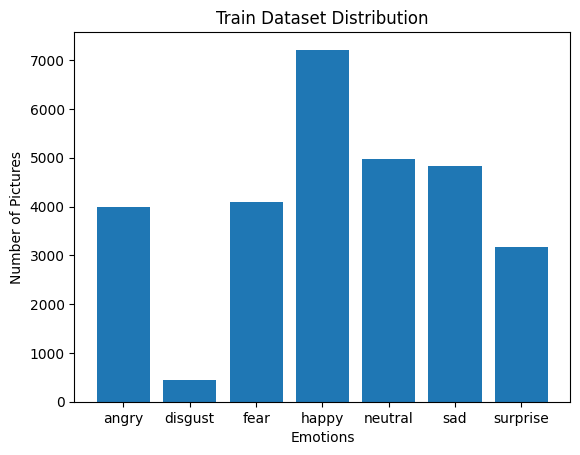

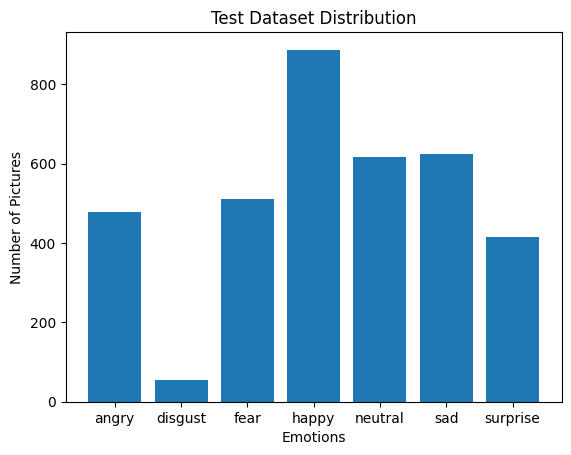

In [11]:
## 1.7 Dataset and label distribution graph

train_nameList, train_numList = labelsCountAndName(train_label)
test_nameList, test_numList = labelsCountAndName(test_label)

plotDistributionBarGraph(train_nameList, train_numList, "Train Dataset Distribution")
plotDistributionBarGraph(test_nameList, test_numList, "Test Dataset Distribution")

<function matplotlib.pyplot.show(close=None, block=None)>

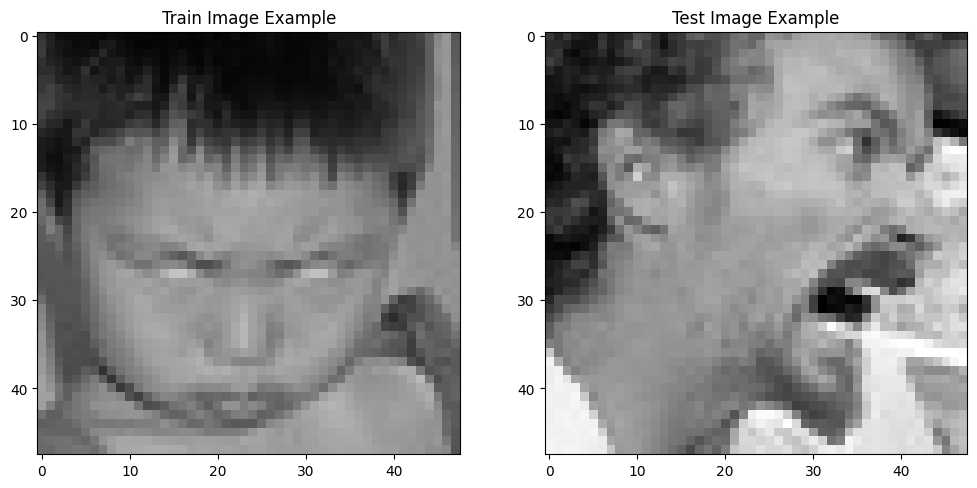

In [12]:
## 1.8 Showcase first image of train and testing dataset

fig = plt.figure(figsize=(12, 7))

trainImgAddress = train_img[0]
testImgAddress = test_img[0]

trainImgData = cv2.imread(trainImgAddress)
testImgData = cv2.imread(testImgAddress)

plt.subplot(1, 2, 1)
plt.imshow(trainImgData, cmap="gray")
plt.title("Train Image Example")

plt.subplot(1, 2, 2)
plt.imshow(testImgData, cmap="gray")
plt.title("Test Image Example")

plt.show

In [13]:
## 1.9 Function of extracting first n images of all emotions for 1.10

def getImagePathAndLabels(numPicPerEmotion):
    picAdd = []
    picLabel = []

    for emotion in train_nameList:
        trainWD = os.path.join(train_directory, emotion)
        testWD = os.path.join(test_directory, emotion)

        numCheck = 0

        for trainImgName in os.listdir(trainWD):
            
            trainImgPath = os.path.join(trainWD, trainImgName)

            picAdd.append(trainImgPath)
            picLabel.append(emotion)
            numCheck += 1
            if numCheck == numPicPerEmotion:
                break
        
        numCheck = 0

        for testImgName in os.listdir(testWD):
            
            testImgPath = os.path.join(testWD, testImgName)

            picAdd.append(testImgPath)
            picLabel.append(emotion)
            numCheck += 1
            if numCheck == numPicPerEmotion:
                break
        
    return picAdd, picLabel


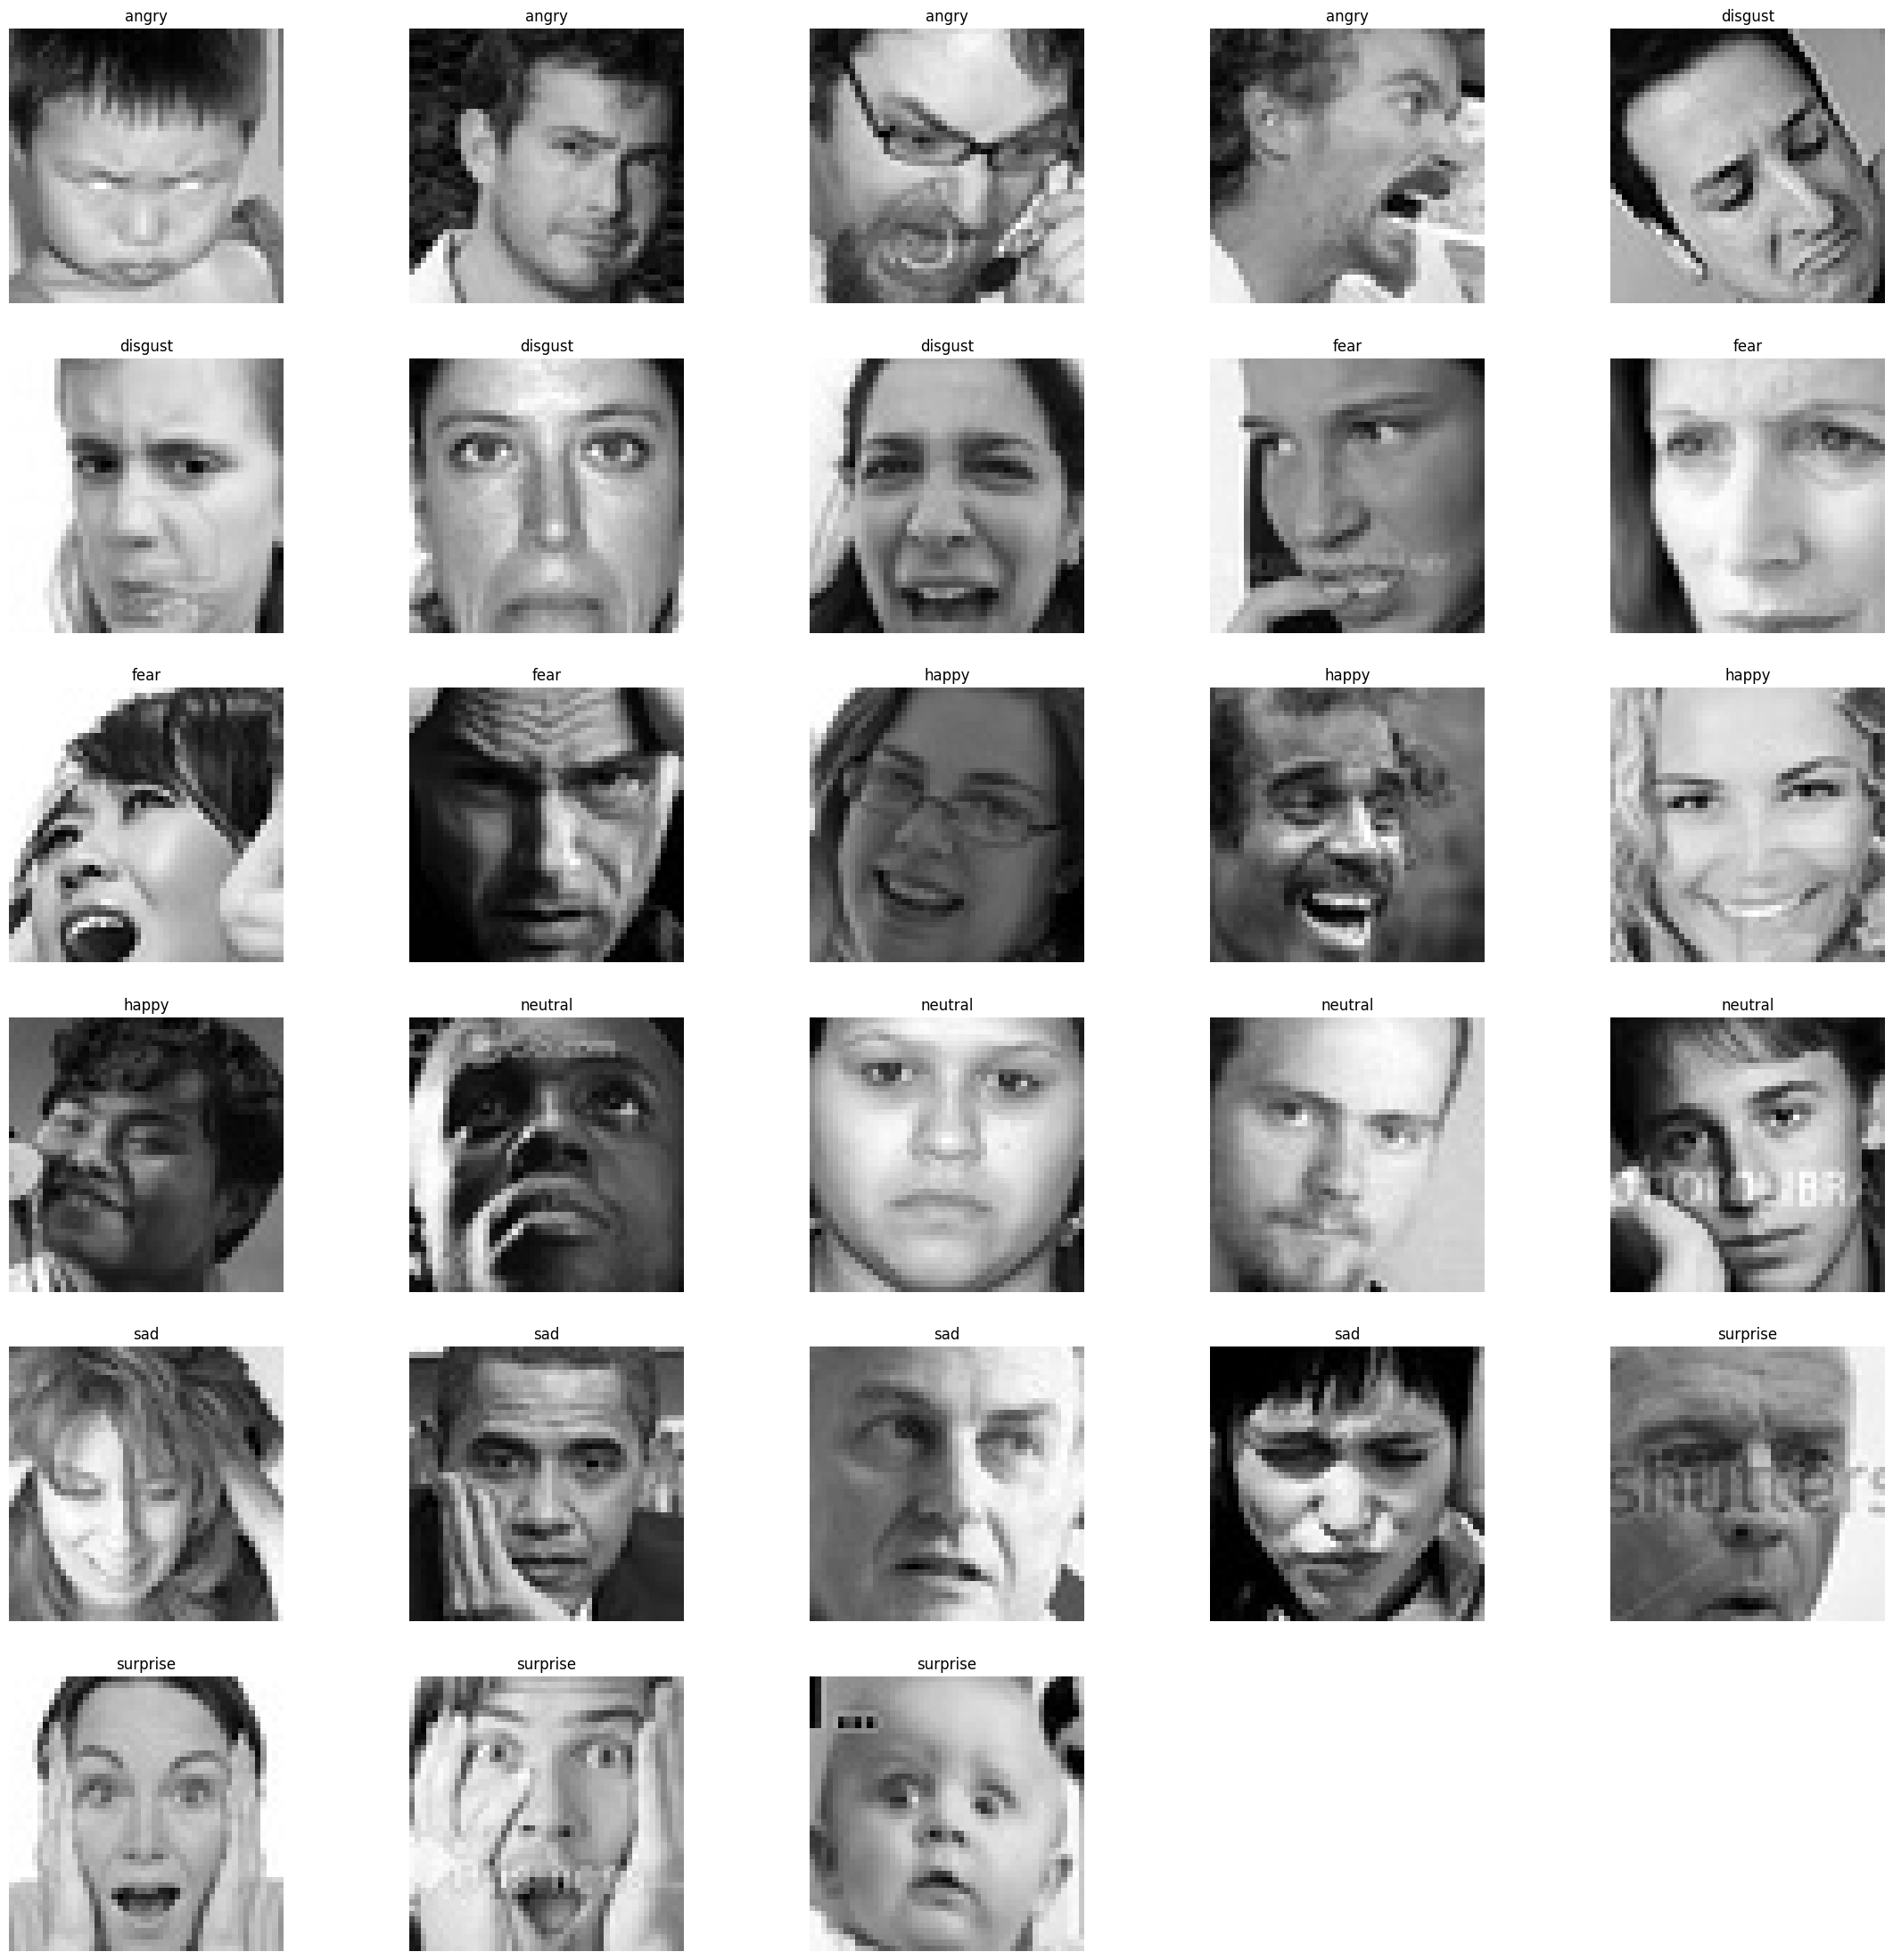

In [14]:
## 1.10 Showcase grid of example images of all emotion labels

import math

numPicPerEmotion = 2

plotSize = numPicPerEmotion * 7 * 2

subplotSize = math.ceil(plotSize / 5)

fig = plt.figure(figsize=(plotSize, plotSize))

picAdd, picLabel = getImagePathAndLabels(numPicPerEmotion)

for i in range(0, plotSize):
    plt.subplot(subplotSize, 5, i+1)
    img = plt.imread(picAdd[i])

    plt.imshow(img, cmap="gray")
    plt.title(picLabel[i])
    plt.axis('off')

plt.show()

Shape of greyscale image: (48, 48)
Shape of color image: (48, 48, 3)


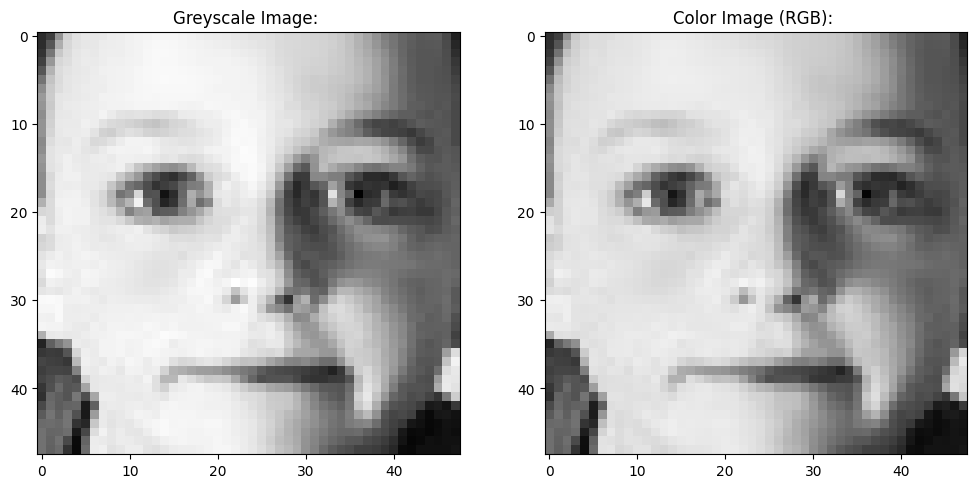

In [15]:
## 1.11 Showcase of conversion of greyscale images to RGB images (For architecture purposes)

import random

luckyNumber = random.randrange(0, len(train_img))

greyImg = cv2.imread(train_img[luckyNumber], cv2.IMREAD_GRAYSCALE)

colorImg = cv2.cvtColor(greyImg, cv2.COLOR_GRAY2RGB)

print(f"Shape of greyscale image: {greyImg.shape}")
print(f"Shape of color image: {colorImg.shape}")

# Additional 2 more channels in the image data which represents the RGB channels

fig = plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.imshow(greyImg, cmap="grey")
plt.title("Greyscale Image: ")

plt.subplot(1, 2, 2)
plt.imshow(colorImg)
plt.title("Color Image (RGB): ")

plt.show()

# No color difference due to it originally being greyscale


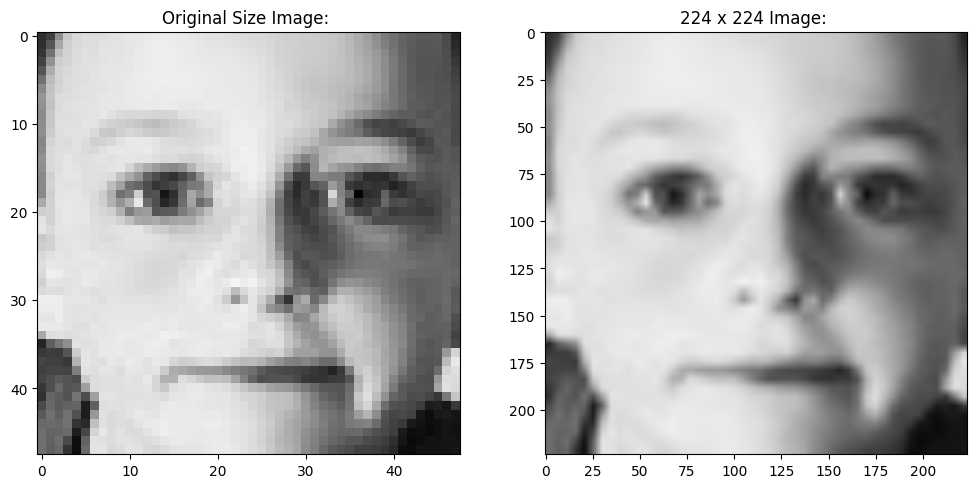

In [16]:
## 1.12 Showcase of resizing of image to 224 x 244 pixels (For architecture purposes)

testImg = cv2.imread(train_img[luckyNumber], cv2.IMREAD_COLOR_RGB)

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.Resize((224, 224)),
])

biggerImg = transform(testImg)

fig = plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.imshow(testImg)
plt.title("Original Size Image: ")

plt.subplot(1, 2, 2)
plt.imshow(biggerImg.permute(1, 2, 0)) # Reorders the image data from (C x H x W) to (H x W x C)
plt.title("224 x 224 Image: ")

plt.show()

In [17]:
## 1.13 Function for detecting faces using Haar Cascade Classifier for 1.14

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)

def adjustedFaceDetection(img):
    face_img = img.copy()

    face_rectangle = face_cascade.detectMultiScale(face_img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object

    for (x, y, w, h) in face_rectangle: # x_coord, y_coord, width, height
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 1) # Draw rectangle over detected face

        # (x, y) --> bottom left corner coordinates
        # (x+w, y+h) --> upper right corner coordinates after adding image width and height
        # (255, 255, 255) --> Image color in (R,G,B) which is black color
        # 10 --> Line thickness of 10 pixels

    return face_img

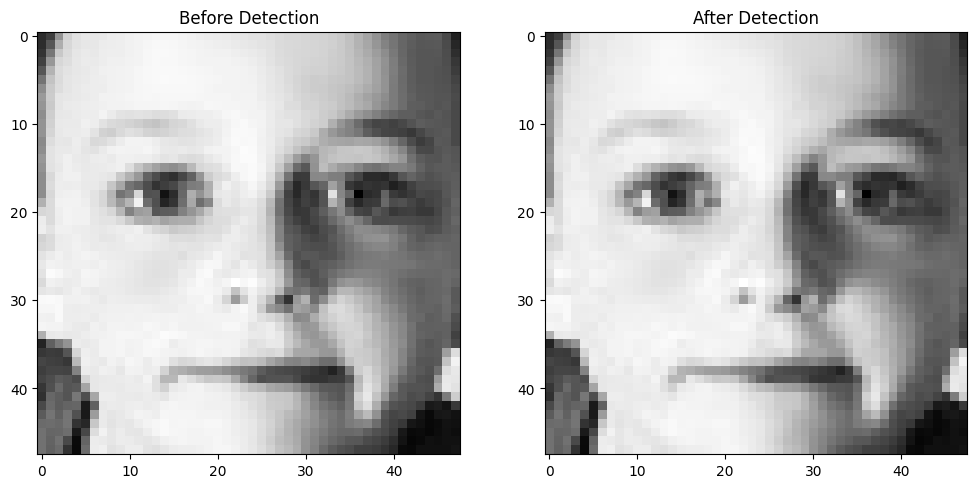

In [18]:
## 1.14 Showcase detected face comparison with original image 

imgData = plt.imread(train_img[luckyNumber])

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(imgData, cmap='grey')
plt.title("Before Detection")

detectedImgData = adjustedFaceDetection(imgData)

plt.subplot(1, 2, 2)
plt.imshow(detectedImgData, cmap="grey")
plt.title("After Detection")

plt.show()

In [19]:
## 1.15 Function to crop detected face and scale to 48x48 pixels for 1.16

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)


def cropImageOfDetectedFace(img):

    face_rectangle = face_cascade.detectMultiScale(img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object


    for (x, y, w, h) in face_rectangle:

        croppedImg = img[y+1 : y+h, x+1: x+w]

        resizedCroppedImg = cv2.resize(croppedImg, dsize=(224, 224))

        return resizedCroppedImg
    
    return img

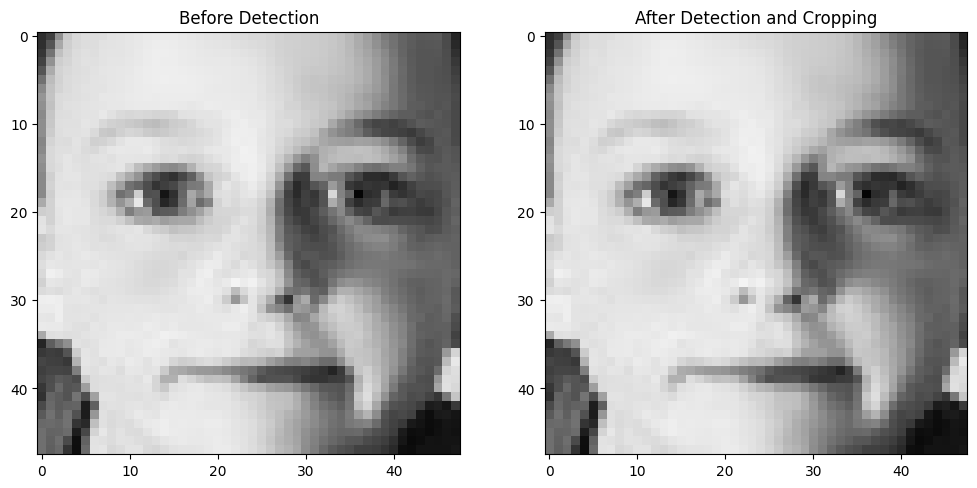

In [20]:
## 1.16 Showcase comparison between original image and cropped detected face image

imgData = cv2.imread(train_img[luckyNumber])

resizedCroppedImg = cropImageOfDetectedFace(imgData)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(imgData, cmap='grey')
plt.title("Before Detection")

plt.subplot(1, 2, 2)
plt.imshow(resizedCroppedImg, cmap="grey")
plt.title("After Detection and Cropping")

plt.show()

Text(0.5, 1.0, 'After Flipping')

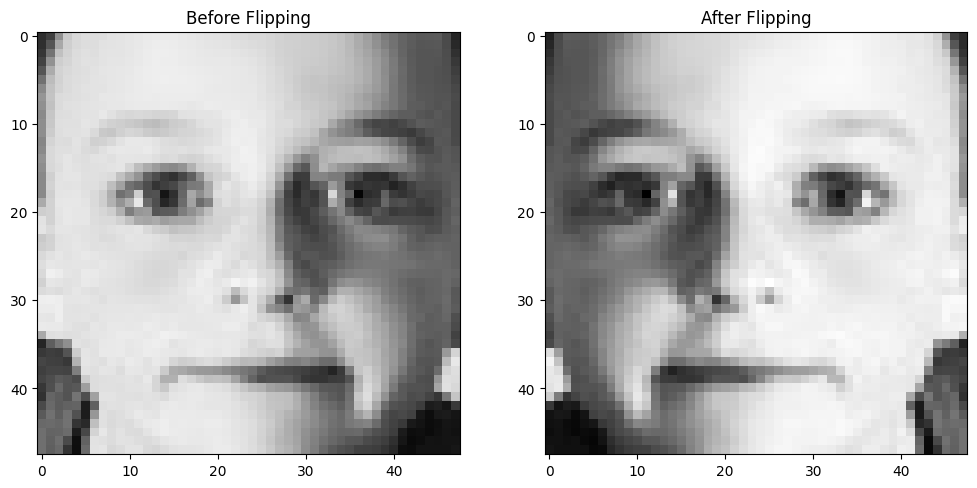

In [21]:
## 1.17 Showcase of comparisons between original image and randomly horizontal fliped image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomHorizontalFlip(p=1), # 100% chance to flip an image
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Flipping")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Flipping")

Text(0.5, 1.0, 'After Cropping')

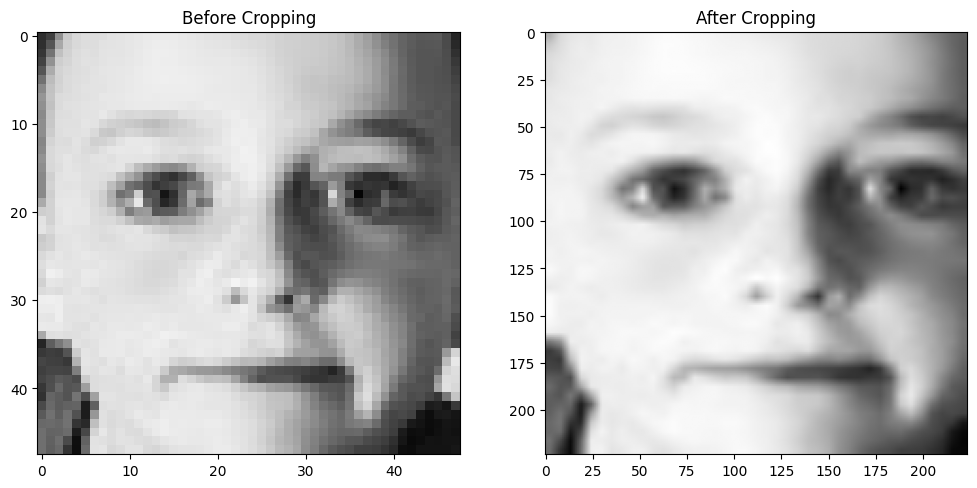

In [22]:
## 1.18 Showcase of comparisons between original image and randomly cropped image up to 10%

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomResizedCrop(size=(224, 224), scale=(0.8, 0.9), antialias=True), # Resize to 48x48 scalling between 0.8 to 0.9
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Cropping")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Cropping")

Text(0.5, 1.0, 'After Affine')

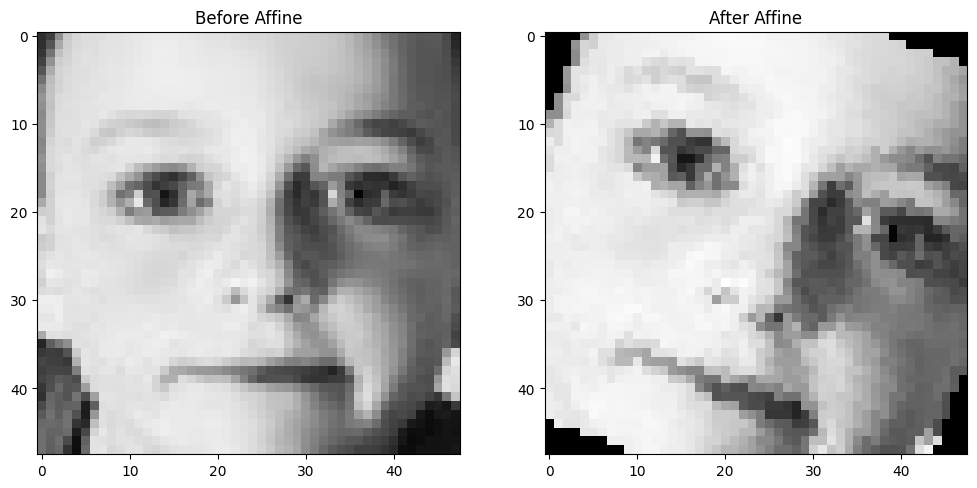

In [23]:
## 1.19 Showcase of comparisons between original image and scalling image between 80% to 120% and rotating betweeen -25 to 25

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random affine transformation the input keeping center invariant.
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Affine")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Affine")

Text(0.5, 1.0, 'After Brightness Adjustment')

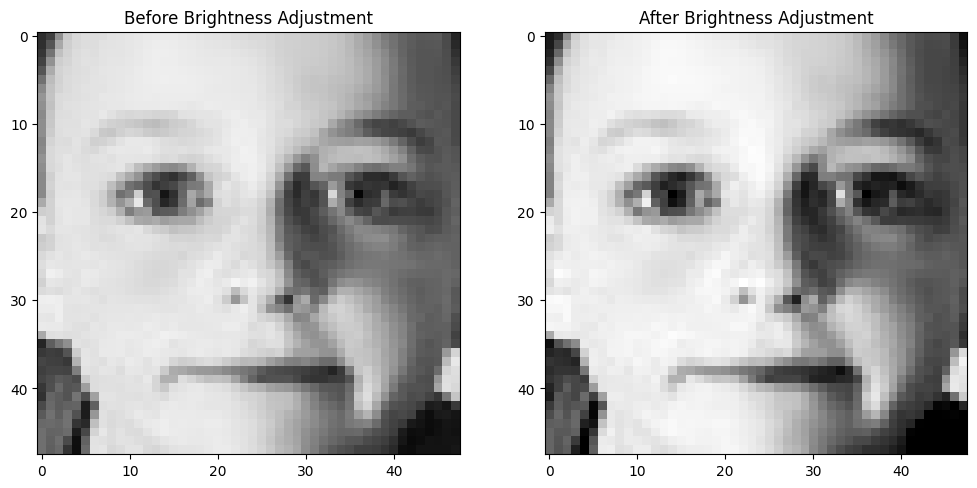

In [24]:
## 1.20 Showcase of comparisons between original image and brightness adjusted image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Brightness Adjustment")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Brightness Adjustment")

Text(0.5, 1.0, 'After Contrast Adjustment')

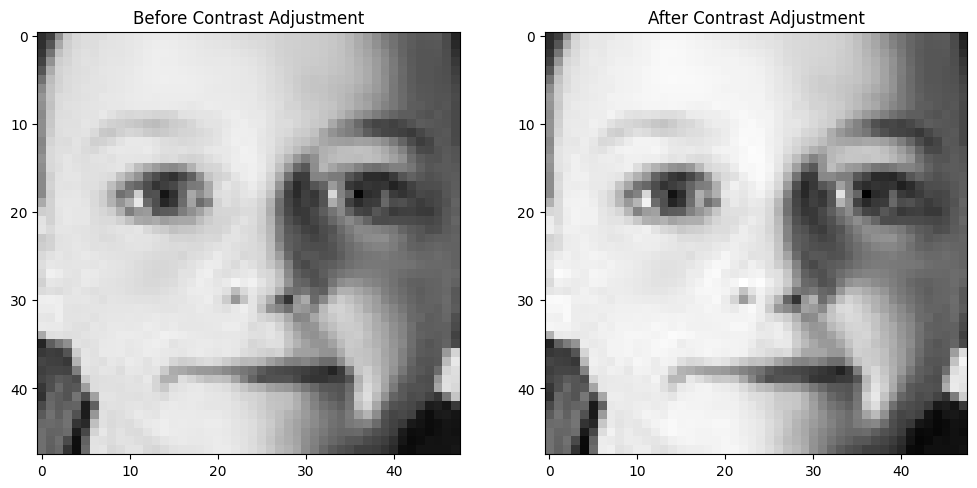

In [25]:
## 1.21 Showcase of comparisons between original image and contrast adjusted image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomAutocontrast(p=1.0),
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Contrast Adjustment")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Contrast Adjustment")

Transformed image type: <class 'torchvision.tv_tensors._image.Image'>
Transformed image size: torch.Size([3, 224, 224])
Transformed image array: 
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


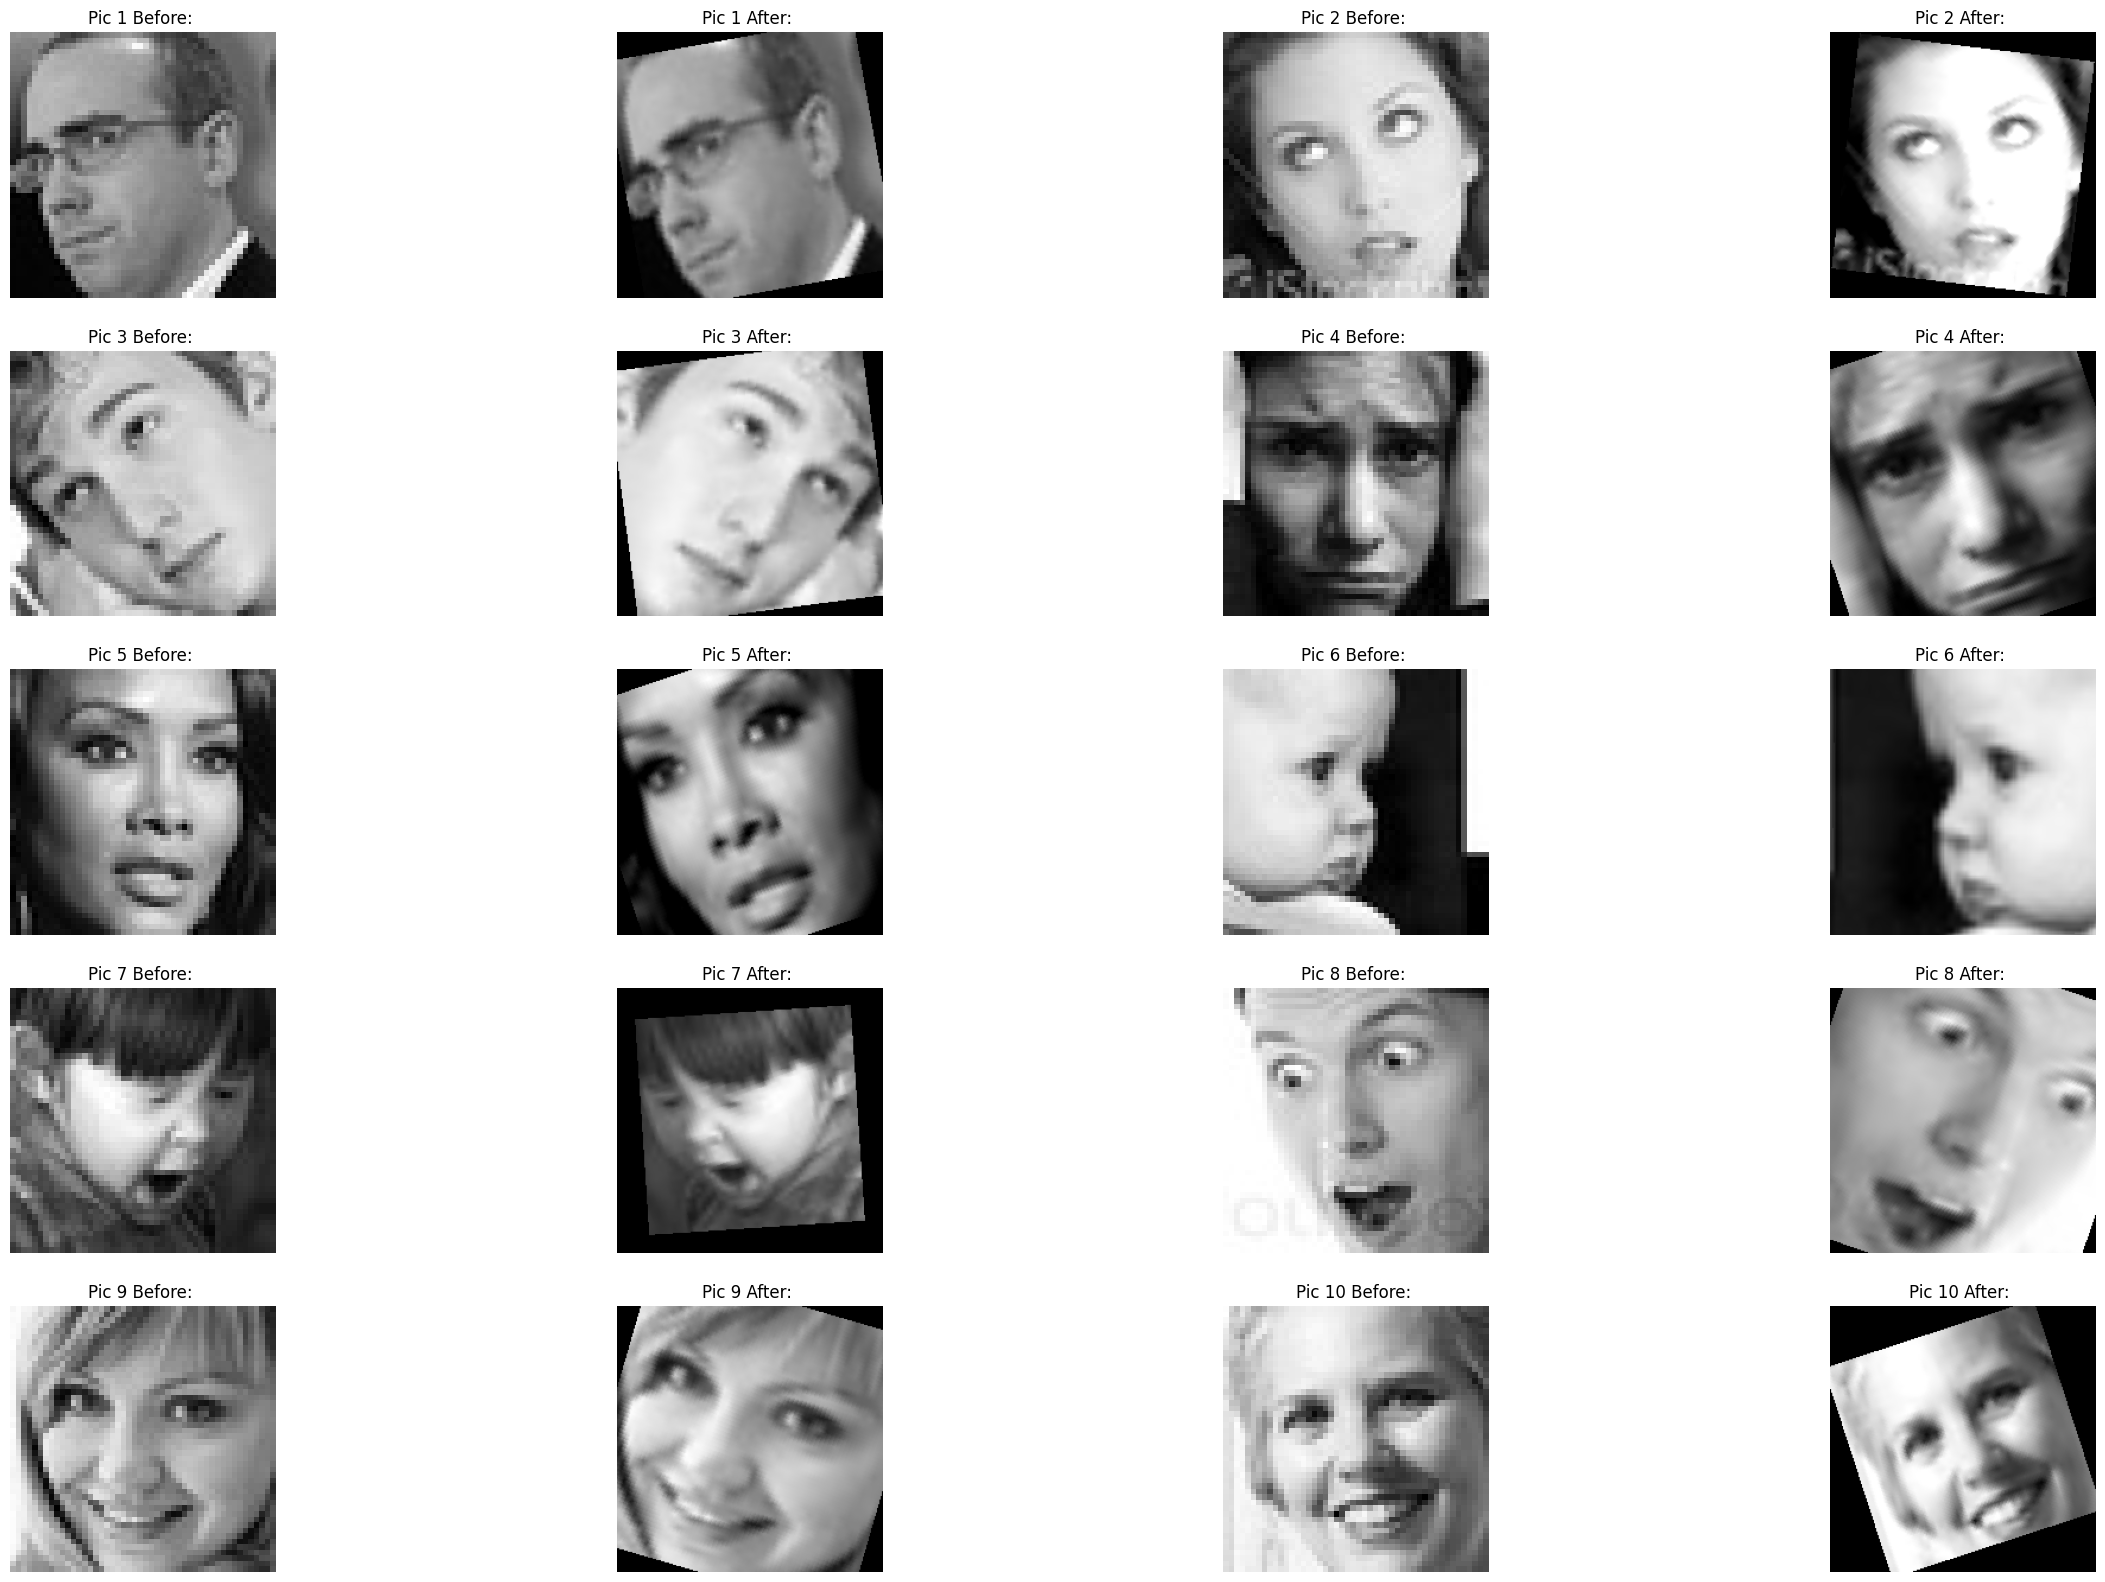

In [26]:
## 1.22 Showcase 10 Transformed Image With Combination of All Transformation 

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.Resize((224, 224)),
    v2.RandomHorizontalFlip(p=0.5), # 100% chance to flip an image
    v2.RandomResizedCrop(size=(224, 224), scale=(0.8, 0.9), antialias=True), # Resize to 48x48 scalling between 0.08 to 0.1
    v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random degree rotation of -25 --> +20 while scaling size between 0.8 to 1.2
    v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
    v2.RandomAutocontrast(p=1.0),
])

images = []

for i in range(0, 10):
    randNum = random.randrange(0, len(train_img))

    originalImg = cv2.imread(train_img[randNum], cv2.IMREAD_GRAYSCALE)
    images.append(originalImg)

    colorImg = cv2.cvtColor(originalImg, cv2.COLOR_GRAY2RGB)

    transformedImg = transform(colorImg)
    images.append(transformedImg)

print(f"Transformed image type: {type(transformedImg)}")
print(f"Transformed image size: {transformedImg.shape}")
print(f"Transformed image array: \n{transformedImg[:1]}")

fig = plt.figure(figsize=(30, 20))

imgNameList = []

for j in range(1, 11):
    imgNameList.append(str(j))
    imgNameList.append(str(j))

for i in range(0, 20):
    plt.subplot(5, 4, i+1)
    
    if (i+1) % 2 == 0:
        plt.imshow(images[i].permute(1, 2, 0))
        imgName = "Pic " + imgNameList[i] + " After: "
    else:
        plt.imshow(images[i], cmap="grey")
        imgName = "Pic " + imgNameList[i] + " Before: "
    
    plt.title(imgName)

    plt.axis('off')

plt.show()


In [27]:
## 1.23 Whole Function for Entire Preprocessing Step

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)

def cropImageOfDetectedFace(img):

    face_rectangle = face_cascade.detectMultiScale(img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object

    for (x, y, w, h) in face_rectangle:

        croppedImg = img[y+1 : y+h, x+1: x+w]

        resizedCroppedImg = cv2.resize(croppedImg, dsize=(224,224))

        return resizedCroppedImg
    
    return img

def dataPreprocessing(img):
    
    detectedFace = cropImageOfDetectedFace(img)

    transform = v2.Compose([
        v2.ToImage(), # Converting to tensor of type float32
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224, 224)),
        v2.RandomHorizontalFlip(p=0.5), # 100% chance to flip an image
        v2.RandomResizedCrop(size=(224, 224), scale=(0.8, 0.9), antialias=True), # Resize to 224x224 scalling between 0.08 to 0.1
        v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random degree rotation of -25 --> +20 while scaling size between 0.8 to 1.2
        v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
        v2.RandomAutocontrast(p=1.0),
    ])

    transformedImgNew = transform(detectedFace)

    return transformedImgNew

Original greyscale image data type: <class 'numpy.ndarray'>
Original greyscale image shape: (48, 48)
Transfomed image type: <class 'torchvision.tv_tensors._image.Image'>
Transformed image shape: torch.Size([3, 224, 224])


Text(0.5, 1.0, 'After Preprocess')

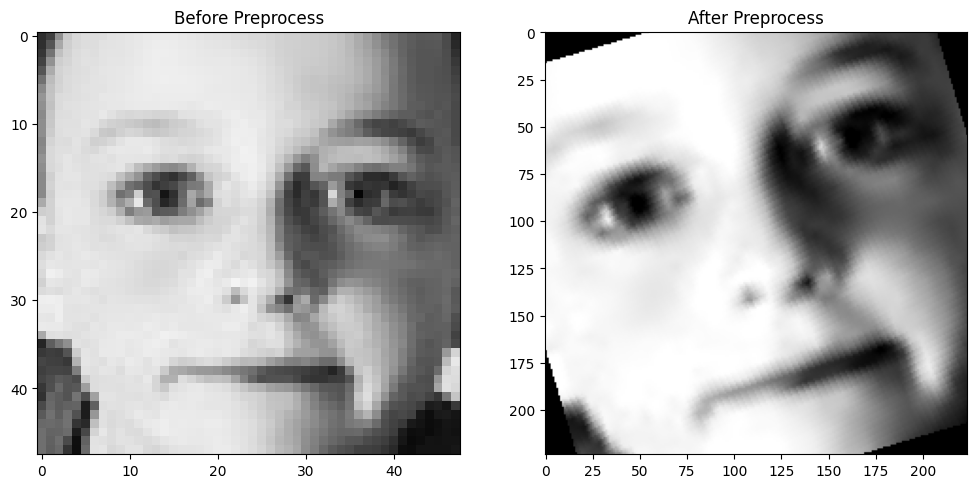

In [28]:
## 1.24 Testing for Whole Preprocess Image for The Dataset

testImgAdd = train_img[luckyNumber]
testImg = cv2.imread(testImgAdd, cv2.IMREAD_GRAYSCALE)

print(f"Original greyscale image data type: {type(testImg)}")
print(f"Original greyscale image shape: {testImg.shape}")

testImg = cv2.cvtColor(testImg, cv2.COLOR_GRAY2RGB)

transformed = dataPreprocessing(testImg)
print(f"Transfomed image type: {type(transformed)}")
print(f"Transformed image shape: {transformed.shape}")

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(testImg, cmap="grey")
plt.title("Before Preprocess")

plt.subplot(1, 2, 2)
plt.imshow(transformed.permute(1, 2, 0))
plt.title("After Preprocess")

Image shape: (48, 48)
Image ::
 [[ 46  63 143 201 216 222 221 222 226 227 229 231 233 234 234 234 232 230
  228 226 225 224 221 219 216 216 213 210 207 207 205 203 201 198 193 184
  172 159 142 123 113 101  94  89  90  91  74  35]
 [ 47  85 168 207 217 221 221 226 227 228 230 232 235 237 237 236 234 233
  231 229 228 227 224 222 220 218 215 210 208 207 205 204 202 199 194 185
  172 161 145 128 114 100  92  86  87  88  75  40]
 [ 54 115 192 210 220 224 222 227 228 228 230 233 236 238 238 237 235 234
  232 231 230 230 228 226 224 221 216 211 208 206 205 204 202 198 194 186
  175 165 152 137 118 101  90  85  85  86  77  48]
 [ 66 146 206 213 221 225 224 227 229 229 231 233 236 238 237 237 235 234
  233 232 232 232 230 229 227 223 218 212 209 206 204 203 201 197 194 188
  178 169 156 141 122 104  91  85  85  84  78  56]
 [ 85 172 211 217 221 223 226 229 230 231 232 235 237 238 238 238 237 236
  235 234 233 233 232 231 229 225 220 215 210 206 202 200 200 196 193 188
  180 171 157 140 123 10

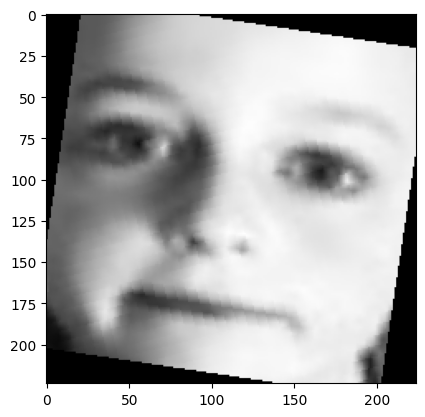

In [29]:
## 1.25 Testing for image saving mechanism

imgPath = train_img[luckyNumber]

img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)

print(f"Image shape: {img.shape}")
print(f"Image ::\n {img[:5]}")

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
processedImg = dataPreprocessing(img)

processedImg = processedImg.permute(1, 2, 0) # Permute to (H x W x C)
processedImg = processedImg.numpy() # Convert tensor to numpy float

print(f"1. Shape: {processedImg.shape}")
print(f"1. Array: {processedImg[:5]}")

# Conversion from numpy float to uint8 [0-255]
if processedImg.dtype != np.uint8:
    processedImg = (processedImg * 255).astype(np.uint8)

print(f"New processedImg size: {processedImg.shape}")
print(f"New processedImg type: {type(processedImg)} and variable type: {processedImg.dtype}")
print(f"New processedImg array: {processedImg[:1]}")

plt.imshow(processedImg)

processedImg = Image.fromarray(processedImg) # Take first row only

processedImg = processedImg.convert("L")

processedImg.show()

In [31]:
## 1.26 Preprocess and Save Images into Dataset

def datasetProcessing(directory, folderName, split = False):

    processedDataFoldername = os.path.join(current_wd, "processed_data")

    if not(os.path.isdir(processedDataFoldername)):
        os.mkdir(processedDataFoldername)
    
    trainOrTestFoldername = os.path.join(processedDataFoldername, folderName)
    
    if not(os.path.isdir(trainOrTestFoldername)):
        os.mkdir(trainOrTestFoldername)
    
    if split == True:
        val_dir = os.path.join(processedDataFoldername, "validation")

        if not(os.path.isdir(val_dir)):
            os.mkdir(val_dir)

    counter = 1

    for emotion in os.listdir(directory):
        emotionFolderDir = os.path.join(directory, emotion)

        newEmotionFolderDir = os.path.join(trainOrTestFoldername, emotion)

        if split:
            newValEmotionFolderDir = os.path.join(val_dir, emotion)
            
            if not(os.path.isdir(newValEmotionFolderDir)):
                os.mkdir(newValEmotionFolderDir)

        if not(os.path.isdir(newEmotionFolderDir)):
            os.mkdir(newEmotionFolderDir)
        
        for filename in os.listdir(emotionFolderDir):
            imgPath = os.path.join(emotionFolderDir, filename)
            
            img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)

            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

            processedImg = dataPreprocessing(img)

            processedImg = processedImg.permute(1, 2, 0)

            processedImg = processedImg.numpy() # Take first row only

            if processedImg.dtype != np.uint8:
                processedImg = (processedImg * 255).astype(np.uint8)

            processedImg = Image.fromarray(processedImg) 

            processedImg = processedImg.convert("L") # Convert image from float-format to single-channel greyscale format

            newFilename = str(counter) + ".png"

            if split:
                if (counter % 2 == 0):
                    # Save to test dataset
                    processedImgPath = os.path.join(newEmotionFolderDir, newFilename)

                    processedImg.save(processedImgPath)
                else:
                    # Save to validation dataset
                    processedImgPath = os.path.join(newValEmotionFolderDir, newFilename)

                    processedImg.save(processedImgPath)
            else:
                processedImgPath = os.path.join(newEmotionFolderDir, newFilename)

                processedImg.save(processedImgPath)

            counter += 1
        
        if split:
            print(f"\nThe {folderName} and validation -> '{emotion}' images has been processed and saved")
        else:
            print(f"\nThe {folderName} -> '{emotion}' images has been processed and saved")

existingPath = os.path.join(current_wd, "processed_data", "train", "disgust", "1.png")

if not(os.path.isdir(existingPath)):
    datasetProcessing(train_directory, "train")

    print("\nThe training dataset has been processed and saved.\n")

    datasetProcessing(test_directory, "test", split=True)

    print("\nThe testing and validation dataset has been processed and saved.\n")

else:
    print("The dataset has been preprocessed before.\n Please check the repository")


The train -> 'angry' images has been processed and saved

The train -> 'disgust' images has been processed and saved

The train -> 'fear' images has been processed and saved

The train -> 'happy' images has been processed and saved

The train -> 'neutral' images has been processed and saved

The train -> 'sad' images has been processed and saved

The train -> 'surprise' images has been processed and saved

The training dataset has been processed and saved.


The test and validation -> 'angry' images has been processed and saved

The test and validation -> 'disgust' images has been processed and saved

The test and validation -> 'fear' images has been processed and saved

The test and validation -> 'happy' images has been processed and saved

The test and validation -> 'neutral' images has been processed and saved

The test and validation -> 'sad' images has been processed and saved

The test and validation -> 'surprise' images has been processed and saved

The testing and validation d